In [1]:
import pandas as pd
import json
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from collections import Counter

## Dataframes

In [2]:
mm = pd.read_csv('merged_df.csv')

In [3]:
sg = pd.read_parquet('steam_games.parquet')

## Union entre 'sg' y 'mm.playtime_forever' 

#### La finalidad de este proceso es obtener un dataframe en el cual se realizara la tarea de EDA

In [63]:
mm.head(3)

,genres,title,item_id,year,playtime_forever
0,Racing,Carmageddon Max Pack,282010,1997,9319.0
1,Action,Carmageddon Max Pack,282010,1997,9319.0
2,Classic,Carmageddon Max Pack,282010,1997,9319.0


In [64]:
# Seleccion las columnas necesarias para trabajar
mm_time = mm[['item_id', 'playtime_forever']]

In [4]:
# Inspeccion del DataFrame 'sg'
sg.head(3)

,genres,title,price,specs,item_id,year
0,Strategy,Lost Summoner Kitty,4.99,Single-player,761140,2018
1,Action,Lost Summoner Kitty,4.99,Single-player,761140,2018
2,Indie,Lost Summoner Kitty,4.99,Single-player,761140,2018


In [5]:
sg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703298 entries, 0 to 703297
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   genres   703298 non-null  object
 1   title    703294 non-null  object
 2   price    703298 non-null  object
 3   specs    701391 non-null  object
 4   item_id  703198 non-null  object
 5   year     700791 non-null  object
dtypes: object(6)
memory usage: 32.2+ MB


In [8]:
sg['item_id'] = sg['item_id'].astype(float)
sg['year'] = sg['year'].astype(float)

In [67]:
# Copia de seguridad
sg_copy = sg.copy()

In [68]:
# Función merge() para combinar los DataFrames en base a la columna 'items_id'
df_eda_items = sg_copy.merge( mm_time , on = 'item_id' , how = 'inner' )

In [69]:
df_eda_items

,genres,title,price,specs,item_id,year,playtime_forever
0,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
1,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
2,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
3,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
4,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
...,...,...,...,...,...,...,...
4357762,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357763,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357764,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357765,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0


In [70]:
df_eda_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4357767 entries, 0 to 4357766
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   genres            object 
 1   title             object 
 2   price             object 
 3   specs             object 
 4   item_id           float64
 5   year              float64
 6   playtime_forever  float64
dtypes: float64(3), object(4)
memory usage: 266.0+ MB


In [71]:
# Registros con valores  
df_valores = df_eda_items.dropna(how='any')

In [72]:
df_valores

,genres,title,price,specs,item_id,year,playtime_forever
0,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
1,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
2,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
3,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
4,Racing,Carmageddon Max Pack,9.99,Single-player,282010.0,1997.0,9319.0
...,...,...,...,...,...,...,...
4357762,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357763,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357764,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0
4357765,Horror,Counter-Strike: Condition Zero,9.99,Valve Anti-Cheat enabled,80.0,2004.0,2469131.0


In [73]:
# La cantidad de registros con algun valor nulo es despreciable  (0,01 % aprox.) y por lo tanto se les descartara
proporcion = 1-(df_valores.shape[0] /df_eda_items.shape[0]) 
proporcion 

0.010012008443774034

In [74]:
df = df_valores

In [75]:
# Reemplazo para todos los generos 'Free to Play' el precio 'price' a 0 
sg.loc[sg['genres'] == 'Free to Play', 'price'] = '0'

In [76]:
# Reemplaza varios valores tipo string por 0.0 en la columna 'price' 
a_nulos = ['Free' , 'Free to Play' , 'Play for Free!', 'Free To Play' , 'Install Now' , 'Play WARMACHINE: Tactics Demo' ,
            'Free Mod' , 'Free HITMAN™ Holiday Pack' , 'Play the Demo' , 'Free Movie']

In [77]:
df.loc[df['price'].isin(a_nulos), 'price'] = 0.0

In [78]:
# Elimina los registros donde 'price' es igual a 'Third-party'
df = df[df['price'] != 'Third-party']

In [79]:
# copia de seguridad
df = df.copy()

In [80]:
# Cambio la columna 'price' a tipo float para la estadistica descriptiva
df['price'] = df['price'].astype(float)

In [81]:
# Estadisticas
df.describe(include='all')

,genres,title,price,specs,item_id,year,playtime_forever
count,4314121,4314121,4.314121e+06,4314121,4.314121e+06,4.314121e+06,4.314121e+06
unique,335,7919,NaN,29,NaN,NaN,NaN
top,Indie,CounterAttack,NaN,Single-player,NaN,NaN,NaN
freq,226577,6800,NaN,845213,NaN,NaN,NaN
mean,NaN,NaN,1.320333e+01,NaN,2.839866e+05,2.013724e+03,2.777473e+06
std,NaN,NaN,1.310306e+01,NaN,1.213030e+05,3.133627e+00,2.686015e+07
min,NaN,NaN,0.000000e+00,NaN,1.000000e+01,1.983000e+03,1.000000e+00
25%,NaN,NaN,4.990000e+00,NaN,2.320900e+05,2.013000e+03,7.340000e+03
50%,NaN,NaN,9.990000e+00,NaN,2.956700e+05,2.015000e+03,5.374000e+04
75%,NaN,NaN,1.999000e+01,NaN,3.691900e+05,2.016000e+03,4.329330e+05


### Este Analisis Exploratorio de Datos (EDA), revela la influencia de los diferente juegos y generos respectivamente mediante tres metodos

## Los generos mas jugados, segun 'playtime_forever'

In [82]:
# Agrupar por 'genres' y sumar 'playtime_forever'
df_grouped = df.groupby('genres')['playtime_forever'].sum().reset_index()

# Si deseas ordenar los resultados por la suma en orden descendente, puedes hacerlo así:
df_grouped = df_grouped.sort_values(by='playtime_forever', ascending=False)

In [83]:
# Calcular el porcentaje acumulado (Analisis de Pareto)
df_grouped['porcentaje_acumulado'] = (df_grouped['playtime_forever'].cumsum() / df_grouped['playtime_forever'].sum()) * 100

In [84]:
df_grouped = df_grouped.reset_index(drop=True)
df_grouped

,genres,playtime_forever,porcentaje_acumulado
0,Action,5.785737e+11,4.828547
1,Multiplayer,5.641700e+11,9.536886
2,Co-op,5.192321e+11,13.870192
3,Singleplayer,4.308762e+11,17.466113
4,Shooter,4.206201e+11,20.976442
...,...,...,...
330,Underground,2.434170e+05,99.999998
331,Gaming,1.067030e+05,99.999999
332,Foreign,9.216000e+04,100.000000
333,Feature Film,1.810200e+04,100.000000


In [85]:
# # Los generos mas jugados
df_filtrado = df_grouped[df_grouped['porcentaje_acumulado'] < 80]
df_filtrado.tail(4)

,genres,playtime_forever,porcentaje_acumulado
37,Animation & Modeling,9.746178e+10,77.579245
38,Replay Value,9.462520e+10,78.368949
39,Third Person,8.381574e+10,79.068442
40,Free to Play,7.957410e+10,79.732536


#### De 335 generos, 40 son los que tienen el 80% del tiempo de juego

### Diagrama de barras

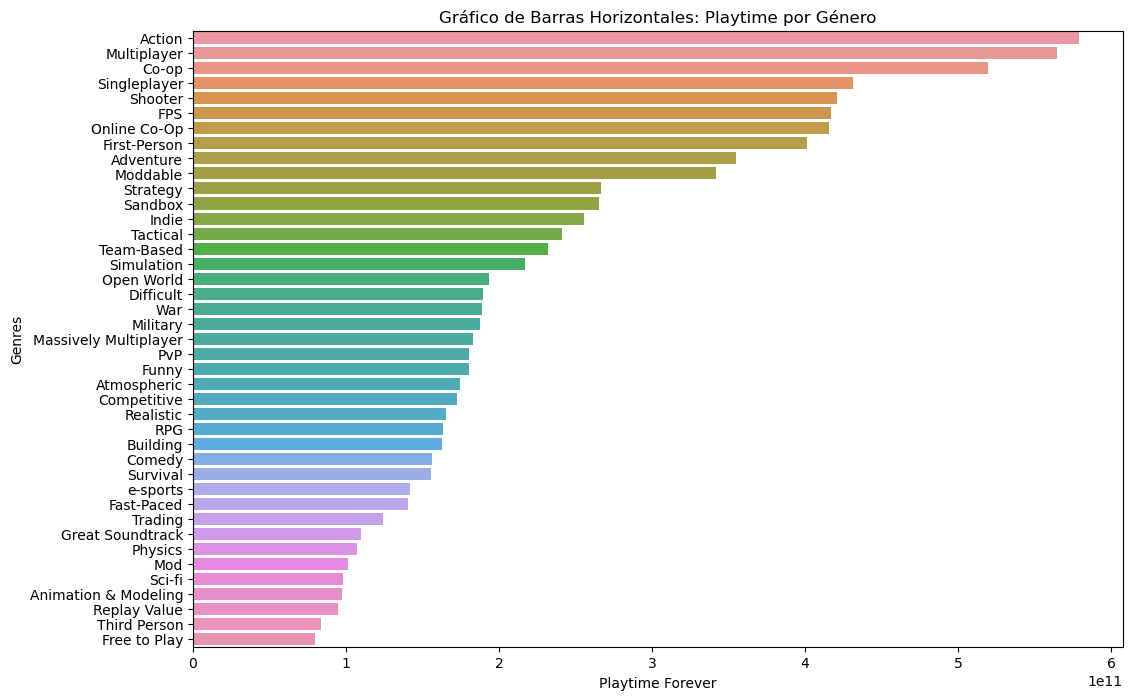

In [86]:
plt.figure(figsize=(12, 8))
sns.barplot(x='playtime_forever', y='genres', data=df_filtrado, orient='h')
plt.xlabel('Playtime Forever')
plt.ylabel('Genres')
plt.title('Gráfico de Barras Horizontales: Playtime por Género')
plt.show()

### Diagrama box-plot del top 5

#### Visualizacion del precio de los generos top 5 mas jugados

In [87]:
top_5 = ['Action' , 'Multiplayer' , 'Co-op' , 'Singleplayer' , 'Shooter']
df_generos_filtrados = df[df['genres'].isin(top_5)].copy()

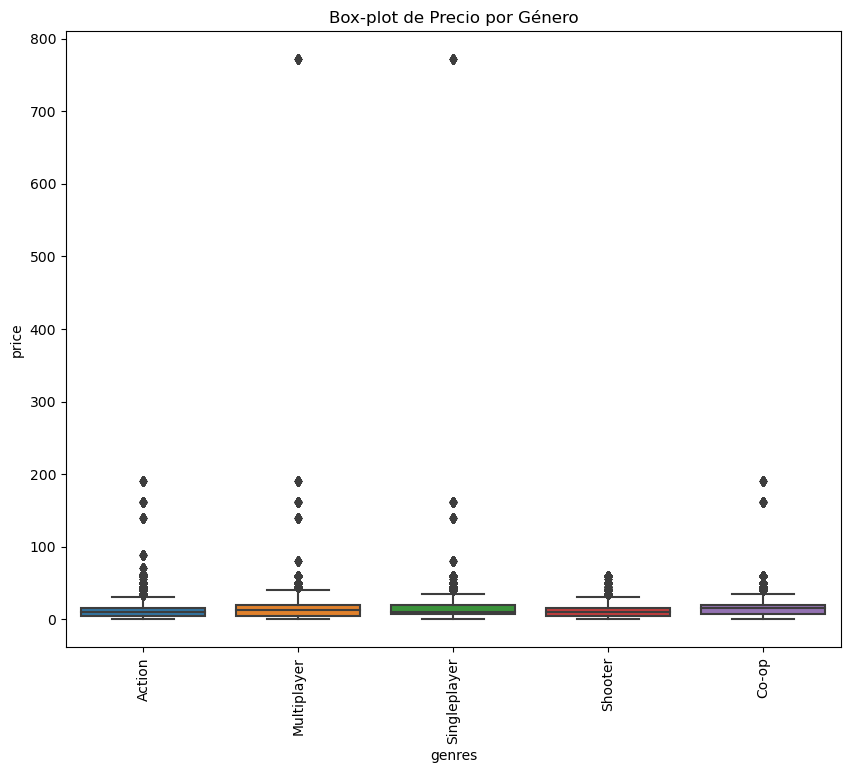

In [88]:
# Define el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea el gráfico de caja
sns.boxplot(x='genres', y='price', data=df_generos_filtrados)

# Rota las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Establece un título para el gráfico
plt.title('Box-plot de Precio por Género')

# Muestra el gráfico
plt.show()

### Diagrama box-plot del top 5 sin outliers

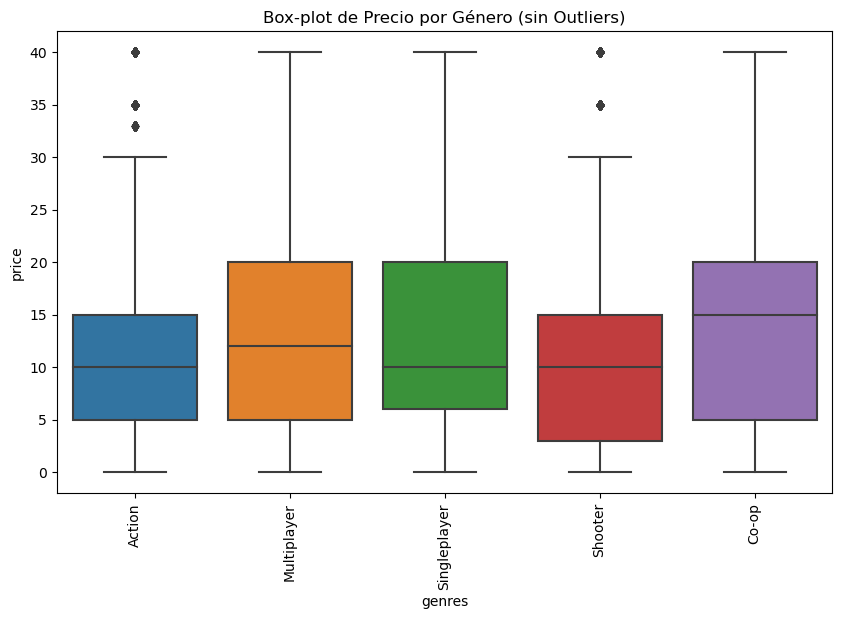

In [89]:
# Calcula el IQR (rango intercuartílico) para 'price'
Q1 = df_generos_filtrados['price'].quantile(0.25)
Q3 = df_generos_filtrados['price'].quantile(0.75)
IQR = Q3 - Q1

# Define un rango aceptable de valores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers
df_sin_outliers = df_generos_filtrados[(df_generos_filtrados['price'] >= limite_inferior) &
                                       (df_generos_filtrados['price'] <= limite_superior)]

# Define el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea el gráfico de caja sin outliers
sns.boxplot(x='genres', y='price', data=df_sin_outliers)

# Rota las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Establece un título para el gráfico
plt.title('Box-plot de Precio por Género (sin Outliers)')

# Muestra el gráfico
plt.show()

##### En esta ultima grafica se puede apreciar que los datos NO siguen un a distribucion normal en cuanto a su precio

## Titulos mas jugados segun 'playtime_forever'

In [90]:
# Agrupar por 'titulo' y sumar 'playtime_forever'
df_grouped_title = df.groupby('title')['playtime_forever'].sum().reset_index()

# Ordenar los resultados por la suma en orden descendente:
df_grouped_title = df_grouped_title.sort_values(by='playtime_forever', ascending=False)

In [91]:
# Calcular el porcentaje acumulado (Analisis de Pareto)
df_grouped_title['porcentaje_acumulado'] = (df_grouped_title['playtime_forever'].cumsum() / df_grouped_title['playtime_forever'].sum()) * 100

In [92]:
df_grouped_title = df_grouped_title.reset_index(drop=True)
df_grouped_title

,title,playtime_forever,porcentaje_acumulado
0,Counter-Strike: Global Offensive,2.482940e+12,20.721633
1,Garry's Mod,1.944233e+12,36.947428
2,Terraria,5.507915e+11,41.544116
3,Left 4 Dead 2,5.261954e+11,45.935534
4,Arma 3,3.705172e+11,49.027724
...,...,...,...
7914,NeverMine,2.000000e+00,100.000000
7915,Captain Curve's Intergalactic Space Adventure,2.000000e+00,100.000000
7916,Monster Challenge Circus,1.000000e+00,100.000000
7917,Rooftop Cop,1.000000e+00,100.000000


In [99]:
# Los mas jugados 85%
df_title_85 = df_grouped_title[df_grouped_title['porcentaje_acumulado'] < 85]
df_title_85

,title,playtime_forever,porcentaje_acumulado
0,Counter-Strike: Global Offensive,2.482940e+12,20.721633
1,Garry's Mod,1.944233e+12,36.947428
2,Terraria,5.507915e+11,41.544116
3,Left 4 Dead 2,5.261954e+11,45.935534
4,Arma 3,3.705172e+11,49.027724
...,...,...,...
73,Empire: Total War™,1.969599e+10,84.337652
74,The Binding of Isaac,1.945185e+10,84.499989
75,TERA,1.942965e+10,84.662141
76,Far Cry 3,1.929252e+10,84.823149


In [94]:
# Los mas jugados 50%
df_filtrado_title = df_grouped_title[df_grouped_title['porcentaje_acumulado'] < 50]
df_filtrado_title

,title,playtime_forever,porcentaje_acumulado
0,Counter-Strike: Global Offensive,2.482940e+12,20.721633
1,Garry's Mod,1.944233e+12,36.947428
2,Terraria,5.507915e+11,41.544116
3,Left 4 Dead 2,5.261954e+11,45.935534
4,Arma 3,3.705172e+11,49.027724


#### De 7967 titulos, 5 son los que tienen el 50% del tiempo de juego total

### Diagrama de barras acumuladas

#### Responde a que generos pertenece estos 5 titulos 

In [95]:
# Lista de los 5 titulos
lista_de_titulos = df_filtrado_title['title'].unique().tolist()

In [96]:
# Se relacionan los 5 titulos con sus respectivos generos
df_titulos_filtrados = df[df['title'].isin(lista_de_titulos)].copy()
df_titulos_filtrados.drop('specs' , axis = 1 , inplace = True )
df_titulos_filtrados = df_titulos_filtrados.drop_duplicates()

In [97]:
conteo_generos = df_titulos_filtrados['genres'].value_counts()
generos_filtrados = conteo_generos[conteo_generos > 2].index.tolist()
df_titulosxgeneros = df_titulos_filtrados[df_titulos_filtrados['genres'].isin(generos_filtrados)]

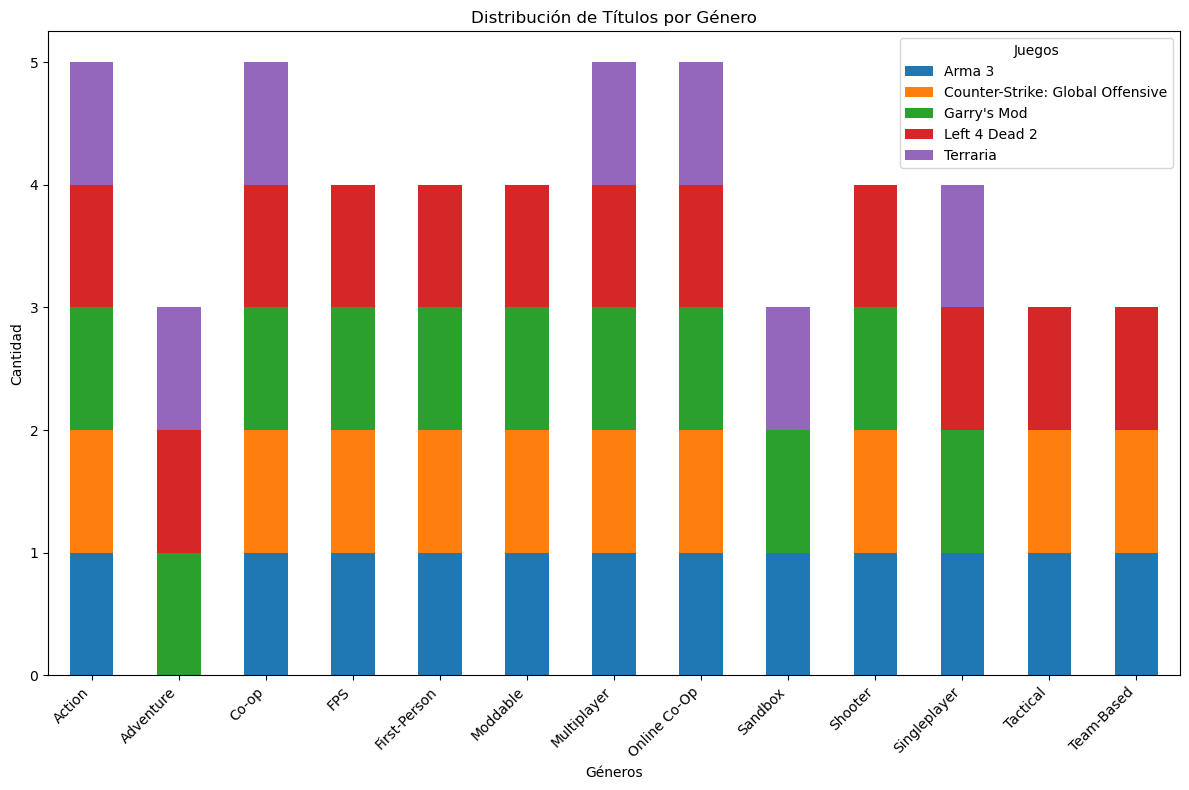

In [98]:
# Grafica de barras acumuladas
# Obtener los generos
top_n_genres = df_titulosxgeneros['genres'].value_counts()

# Filtrar el DataFrame para incluir solo las filas con las categorías más comunes
df_filtered = df_titulosxgeneros[df_titulosxgeneros['genres'].isin(top_n_genres.index)]

# Crear una tabla de contingencia de las dos variables
contingency_table = pd.crosstab(df_filtered['genres'], df_filtered['title'])

# Crear el gráfico de barras apiladas
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))

# Personalizar etiquetas y título
plt.xlabel('Géneros')
plt.ylabel('Cantidad')
plt.title('Distribución de Títulos por Género')

# Rotar etiquetas en el eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.legend(title='Juegos')
plt.tight_layout()
plt.show()


#### Algunos de los generos de este analisis coinciden con el analisis anterior

## Los generos mas vendidos

#### Analisis realizado contando las veces que se repiten los generos en el DataFrame 

In [158]:
# Conteo de los generos
conteo_generos = df['genres'].value_counts()
conteo_generos

Indie               226486
Action              213065
Singleplayer        190296
Adventure           172654
Multiplayer         121843
                     ...  
Photo Editing           60
Underground             57
Audio Production        26
Hardware                21
Feature Film            14
Name: genres, Length: 336, dtype: int64

In [162]:
# Calcula el porcentaje acumulado
porcentaje_acumulado = (conteo_generos / conteo_generos.sum() * 100).cumsum()

# Crea un DataFrame con los géneros y su porcentaje acumulado
df_porcentaje_acumulado = pd.DataFrame({'Género': conteo_generos.index, 'Conteo': conteo_generos.values, 'porcentaje_acumulado': porcentaje_acumulado.values})

In [231]:
# Los generos mas vendidos (Analisis de Pareto) 
df_filtrado = df_porcentaje_acumulado[df_porcentaje_acumulado['porcentaje_acumulado'] < 80]
df_filtrado

,Género,Conteo,porcentaje_acumulado
0,Indie,226486,5.247694
1,Action,213065,10.184422
2,Singleplayer,190296,14.593591
3,Adventure,172654,18.593995
4,Multiplayer,121843,21.417104
...,...,...,...
74,Survival Horror,13027,78.660354
75,Stealth,12736,78.955447
76,Historical,12505,79.245189
77,Physics,12502,79.534861


In [207]:
# Los mas vendidos top 5
df_filtrado = df_porcentaje_acumulado[df_porcentaje_acumulado['porcentaje_acumulado'] < 80]
df_filtrado.head(5)

,Género,Conteo,porcentaje_acumulado
0,Indie,226486,5.247694
1,Action,213065,10.184422
2,Singleplayer,190296,14.593591
3,Adventure,172654,18.593995
4,Multiplayer,121843,21.417104


#### De 335 generos, 79 corresponden al 80% de las ventas

### Precio promedio por genero y especificaciones de steam del top 5 mas vendidos

In [204]:
top_5 = ['Indie' , 'Action' , 'Singleplayer' ,'Adventure' , 'Multiplayer']
df_generos_filtrados2 = df[df['genres'].isin(top_5)].copy()

In [205]:
df_generos_filtrados2.groupby (['genres','specs'])['price'].mean()

genres        specs                     
Action        Captions available            12.075878
              Co-op                         13.529351
              Commentary available          11.129262
              Cross-Platform Multiplayer    10.610474
              Downloadable Content           9.243731
                                              ...    
Singleplayer  Steam Leaderboards            13.629344
              Steam Trading Cards           13.421056
              Steam Turn Notifications      10.835620
              Steam Workshop                19.036161
              Valve Anti-Cheat enabled      20.026775
Name: price, Length: 139, dtype: float64

### Moda del precio por genero y especificaciones de steam del top 5 mas vendidos

In [211]:
 df_generos_filtrados2.groupby(['genres', 'specs'])['price'].apply(lambda x: x.mode().tolist())

genres        specs                     
Action        Captions available            [9.99, 19.99]
              Co-op                                 [0.0]
              Commentary available                [19.99]
              Cross-Platform Multiplayer            [0.0]
              Downloadable Content                 [9.99]
                                                ...      
Singleplayer  Steam Leaderboards                   [9.99]
              Steam Trading Cards                  [9.99]
              Steam Turn Notifications        [0.0, 9.99]
              Steam Workshop                      [14.99]
              Valve Anti-Cheat enabled            [19.99]
Name: price, Length: 139, dtype: object

## CVS Para el modelo de ML

#### La creacion del CSV correspondiente al modelo de ML se desarrollo en esta etapa debido a que las columnas utilizadas son consideradas relevantes en la etapa de Analisis exploratorio de Datos (EDA) 

In [2]:
# Leer el contenido del archivo output_steam_games.json
data = []
with open('output_steam_games.json') as f:
    for line in f:
        data.append(json.loads(line))

In [130]:
df = pd.DataFrame(data)

In [131]:
# Seleccion de las columnas que se necesitan
df = df[['title' , 'tags']]

In [132]:
# Elimino los registros innecesarios
df = df.dropna()

In [133]:
df1 = df.copy()

In [134]:
# Agregacion de variables dummies
# Paso 1: Convierte las listas en cadenas de texto
df1['tags'] = df1['tags'].apply(lambda x: ','.join(x))

# Paso 2: Crea variables dummies
tags_dummies = df1['tags'].str.get_dummies(',')

# Combina las variables dummies con el DataFrame original
df1 = pd.concat([df1, tags_dummies], axis=1)

# Ahora df contendrá las variables dummies de las etiquetas en la columna "tags"


In [135]:
# Seleccion de los 10 generos que se repiten con mas frecuencia  
tags = df['tags']
tags = tags.explode('tags').astype(str).tolist()

# Utiliza Counter para contar la frecuencia en que se repiten los generos
conteo = Counter(tags)

# Utiliza el método most_common para obtener los 10 generos más frecuentes
etiquetas = [valor for valor, _ in conteo.most_common(9)]
etiquetas.insert(0 ,'title')
etiquetas

['title',
 'Indie',
 'Action',
 'Adventure',
 'Casual',
 'Strategy',
 'Simulation',
 'RPG',
 'Singleplayer',
 'Multiplayer']

In [136]:
# Elimino las columnas innecesarias
df1.drop( columns = 'tags' , axis = 1 , inplace = True)

In [137]:
df1

,title,1980s,1990's,2.5D,2D,2D Fighter,3D Platformer,3D Vision,4 Player Local,4X,...,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
88310,Lost Summoner Kitty,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88311,Ironbound,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88312,Real Pool 3D - Poolians,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88313,弹炸人2222,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88315,Battle Royale Trainer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120439,Kebab it Up!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120440,Colony On Mars,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120441,LOGistICAL: South Africa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120442,Russian Roads,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### DataFrame para el modelo de ML

In [138]:
df1 = df1[etiquetas]

In [139]:
df1

,title,Indie,Action,Adventure,Casual,Strategy,Simulation,RPG,Singleplayer,Multiplayer
88310,Lost Summoner Kitty,1,1,0,1,1,1,0,0,0
88311,Ironbound,1,0,0,0,1,0,1,0,0
88312,Real Pool 3D - Poolians,1,0,0,1,0,1,0,0,1
88313,弹炸人2222,0,1,1,1,0,0,0,0,0
88315,Battle Royale Trainer,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
120439,Kebab it Up!,1,1,1,1,0,0,0,0,0
120440,Colony On Mars,1,0,0,1,1,1,0,0,0
120441,LOGistICAL: South Africa,1,0,0,1,1,0,0,0,0
120442,Russian Roads,1,0,0,0,0,1,0,0,0


In [146]:
# Del Analisis de los titulos mas jugados, se seleccionan a los que le correspone el 85% del tiempo
titles_for_df1 = df_title_85.title.astype(str).tolist()
titles_for_df1[:4]

['Counter-Strike: Global Offensive',
 "Garry's Mod",
 'Terraria',
 'Left 4 Dead 2']

In [153]:
df1 = df1[df1['title'].isin(titles_for_df1)]
df1

,title,Indie,Action,Adventure,Casual,Strategy,Simulation,RPG,Singleplayer,Multiplayer
88368,Garry's Mod,1,1,1,0,0,1,0,1,1
88698,Mount &amp; Blade: Warband,1,1,1,0,1,1,1,1,1
88804,Sid Meier's Civilization® V,0,0,0,0,1,1,0,1,1
88825,Fallout: New Vegas,0,1,1,0,0,0,1,1,0
88858,Call of Duty®: Black Ops,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
119997,Killing Floor,0,1,1,0,0,0,0,1,1
120041,Empire: Total War™,0,1,1,0,1,0,0,1,1
120064,Left 4 Dead,0,1,1,0,0,0,0,1,1
120322,Counter-Strike: Source,0,1,0,0,1,1,0,1,1


In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 88368 to 120326
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         78 non-null     object
 1   Indie         78 non-null     int64 
 2   Action        78 non-null     int64 
 3   Adventure     78 non-null     int64 
 4   Casual        78 non-null     int64 
 5   Strategy      78 non-null     int64 
 6   Simulation    78 non-null     int64 
 7   RPG           78 non-null     int64 
 8   Singleplayer  78 non-null     int64 
 9   Multiplayer   78 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 6.7+ KB


In [156]:
# Utiliza to_csv() para guardar el DataFrame como un archivo CSV
df1.to_csv('ml_df.csv', index=False)